In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from Models.functions.utils import listProblems
from Models.functions.plot import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
balanced = '../baseline1/Reports_v2_balanced/'
imbalanced = '../baseline1/Reports_v3_imbalanced/'

In [3]:
!ls {balanced}'gender/esic_pt'

confusion_matrix.csv  predicted_y.numpy.npy  score_y.numpy.npy
expected_y.numpy.npy  report.csv


In [4]:
def check(task):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'balanced_f1score': [], 'imbalanced_f1score': []})
    for p in listProblems(filter_dataset_name = None, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        lang2 = '_'+lang
    
        # balanced
        exp  = balanced + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
        pred = balanced + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        f1_b = f1_score(exp, pred, average="macro")
        
        # imbalanced
        exp  = imbalanced + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
        pred = imbalanced + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        f1_i = f1_score(exp, pred, average="macro")
        
        results = results.append({'dataset': dataset_name, 'lang': lang, 'balanced_f1score': f1_b, 'imbalanced_f1score': f1_i}, ignore_index=True)
        pass
    
    results = results.set_index('dataset')
    return results

# F1_Score evaluate
## Gender

           balanced_f1score  imbalanced_f1score lang
dataset                                             
brmoral            0.628077            0.642146   pt
brblogset          0.753827            0.739426   pt
enblog             0.741315            0.741782   en
b5post             0.866651            0.859583   pt
pan13              0.575037            0.575037   en
pan13              0.631629            0.631629   es
esic               0.366509            0.411248   pt
smscorpus          0.739435            0.719119   en


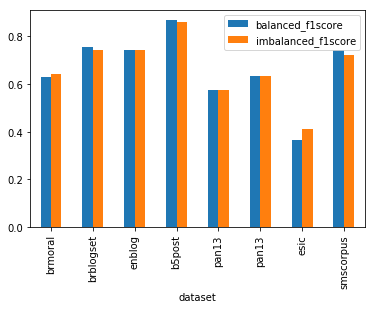

In [5]:
df = check('gender')
df.plot(kind='bar')
print(df)

           balanced_f1score  imbalanced_f1score lang
dataset                                             
brmoral            0.404076            0.414221   pt
brblogset          0.320314            0.313492   pt
enblog             0.715083            0.690046   en
b5post             0.576645            0.564904   pt
pan13              0.504853            0.404076   en
pan13              0.554949            0.455895   es
esic               0.580887            0.573344   pt
smscorpus          0.657485            0.631761   en


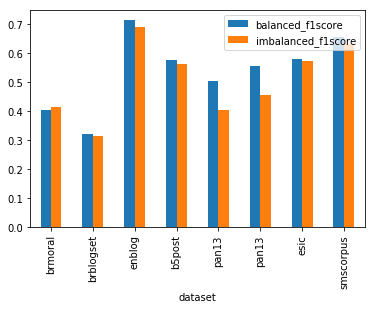

In [6]:
df = check('age')
df.plot(kind='bar')
print(df)

           balanced_f1score  imbalanced_f1score lang
dataset                                             
brmoral            0.402892            0.402525   pt
brblogset          0.362620            0.353841   pt
esic               0.578778            0.508512   pt


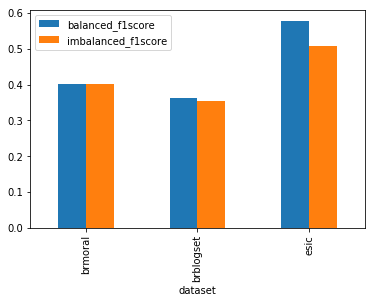

In [7]:
df = check('education')
df.plot(kind='bar')
print(df)

         balanced_f1score  imbalanced_f1score lang
dataset                                           
brmoral          0.406396            0.395821   pt
b5post           0.443835            0.437575   pt


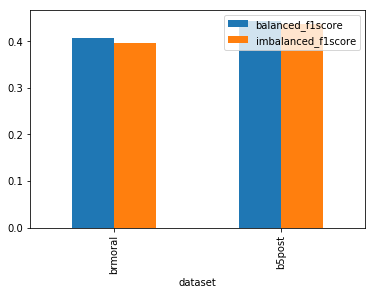

In [8]:
df = check('religion')
df.plot(kind='bar')
print(df)

         balanced_f1score  imbalanced_f1score lang
dataset                                           
esic             0.604788            0.573907   pt


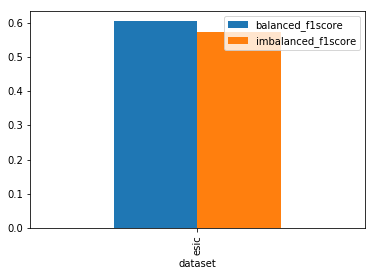

In [9]:
df = check('region')
df.plot(kind='bar')
print(df)

         balanced_f1score  imbalanced_f1score lang
dataset                                           
brmoral          0.491131            0.469857   pt


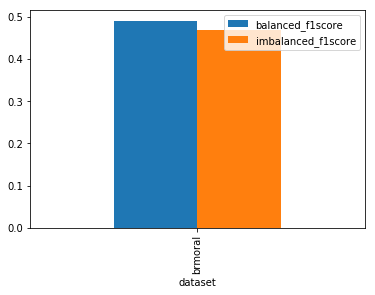

In [10]:
df = check('politics')
df.plot(kind='bar')
print(df)

         balanced_f1score  imbalanced_f1score lang
dataset                                           
brmoral          0.631188            0.638404   pt
b5post           0.679319            0.680456   pt


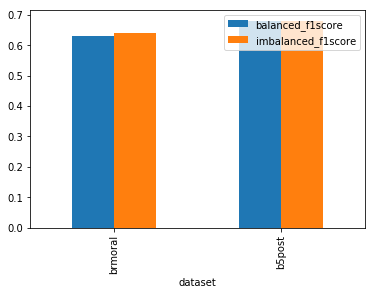

In [11]:
df = check('it')
df.plot(kind='bar')
print(df)

         balanced_f1score  imbalanced_f1score lang
dataset                                           
esic             0.705607            0.700866   pt


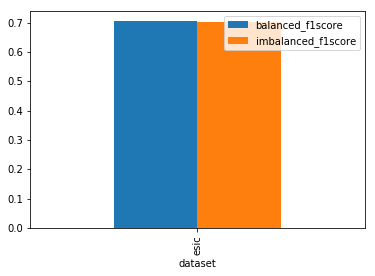

In [12]:
df = check('city')
df.plot(kind='bar')
print(df)

In [62]:
import itertools

In [150]:
def plot_cm(cm1, cm2, classes,i=0,
              normalize=True,
              title='Confusion matrix',
              cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]    
    cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]    
    
    plt.figure().set_size_inches(13, 5)
    
    plt.subplot(1, 2, 1)
    
    
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title+ ' balanced')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm1.max() / 2.
    for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j, i, format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    # second
    
    plt.subplot(1, 2, 2)

    
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title+' imbalanced')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm2.max() / 2.
    for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, format(cm2[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()    
    

In [151]:
def check_cm(task, dataset_name = None):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'balanced_f1score': [], 'imbalanced_f1score': []})
    for p in listProblems(filter_dataset_name = dataset_name, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        lang2 = '_'+lang
        
        print('#'*30)
        print("Dataset ", dataset_name, '/ lang', lang)
        #get classes names
        classes_name = pd.read_csv(balanced + task +bar+ dataset_name +lang2+bar+'confusion_matrix.csv').transpose().values[0]
        
        # balanced        
        exp  = balanced + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
        pred = balanced + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        cm1 = confusion_matrix(exp, pred)
        
        # imbalanced        
        exp  = imbalanced + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
        pred = imbalanced + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        cm2 = confusion_matrix(exp, pred)
        
        plot_cm(cm1, cm2, classes=classes_name,i=0)
        
        pass 

##############################
Dataset  brmoral / lang pt


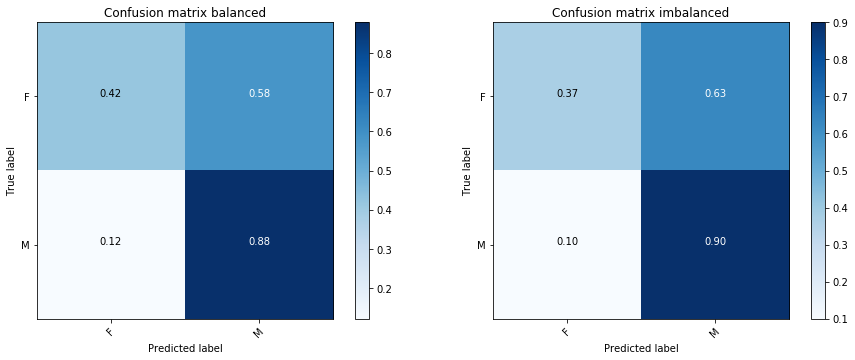

##############################
Dataset  brblogset / lang pt


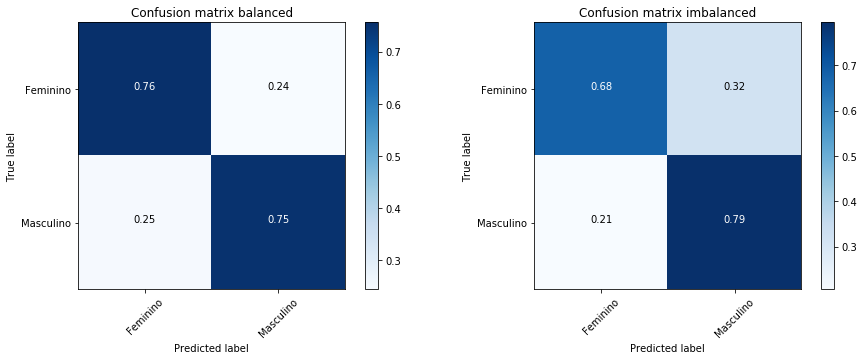

##############################
Dataset  enblog / lang en


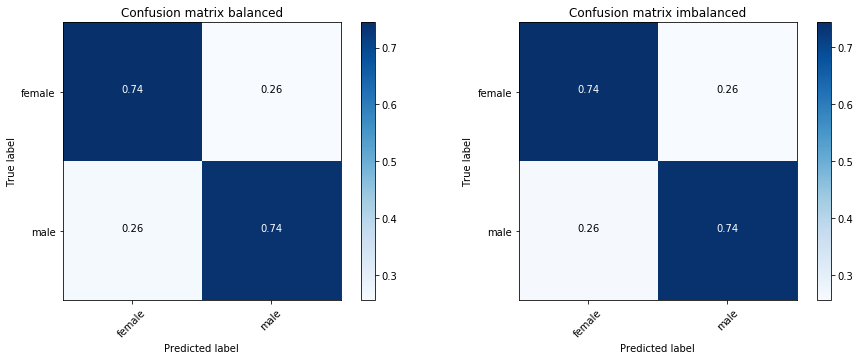

##############################
Dataset  b5post / lang pt


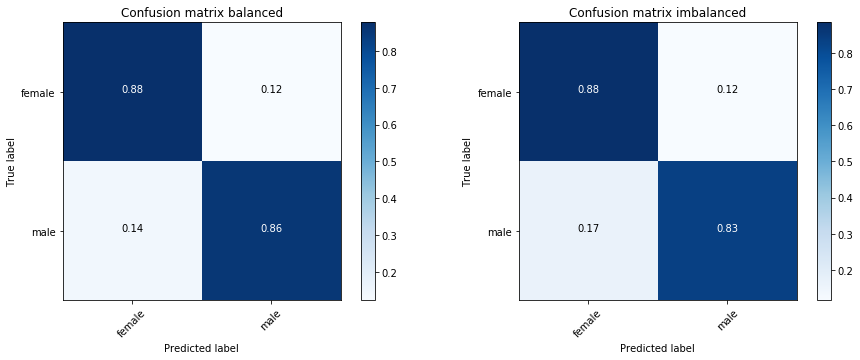

##############################
Dataset  pan13 / lang en


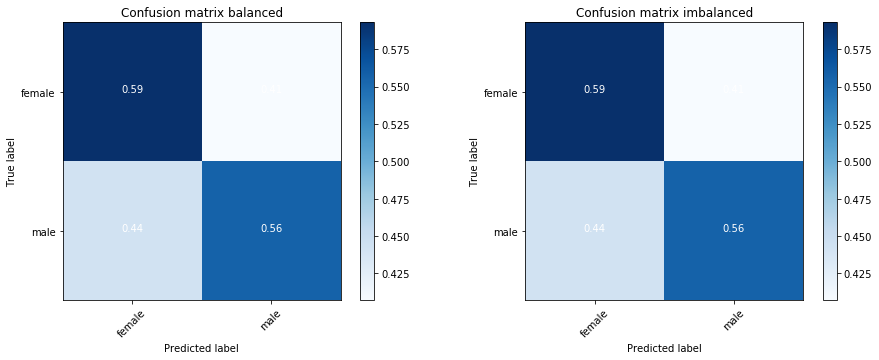

##############################
Dataset  pan13 / lang es


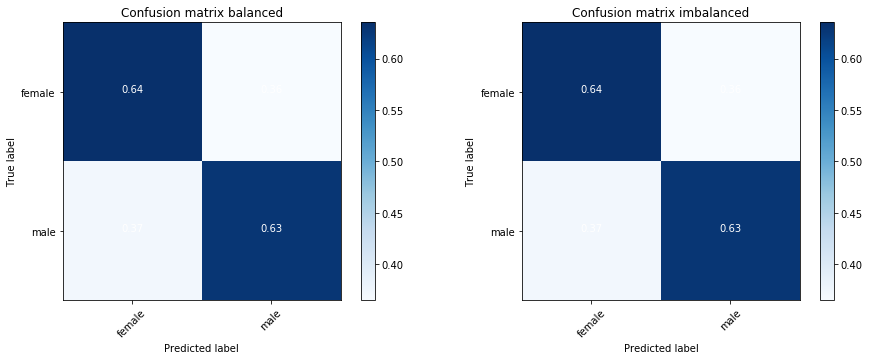

##############################
Dataset  esic / lang pt


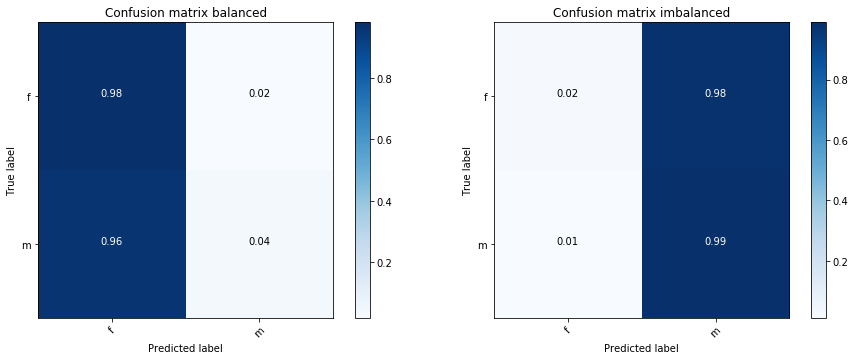

##############################
Dataset  smscorpus / lang en


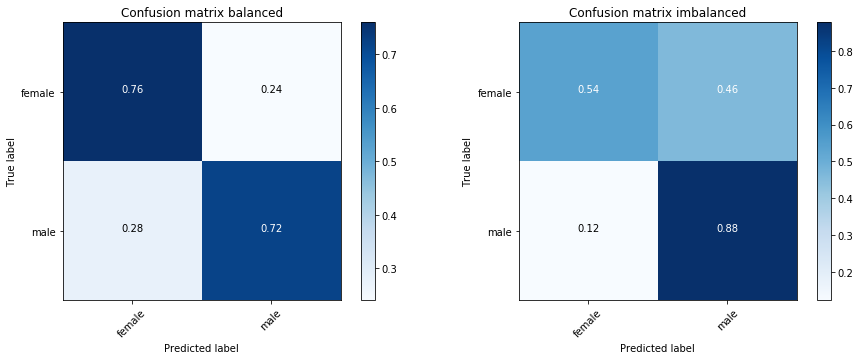

In [152]:
check_cm('gender')

##############################
Dataset  brmoral / lang pt


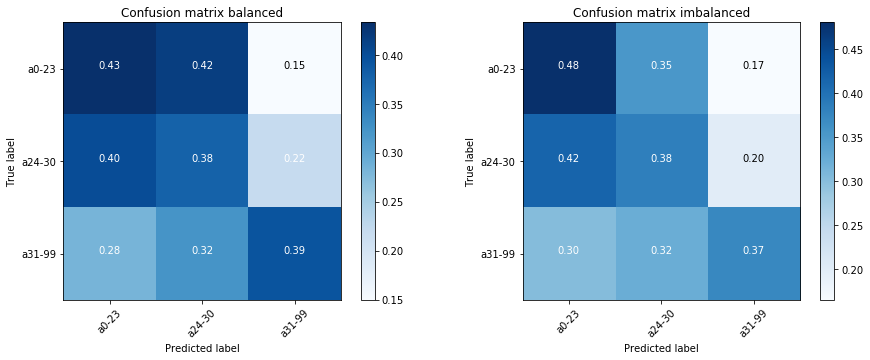

##############################
Dataset  brblogset / lang pt


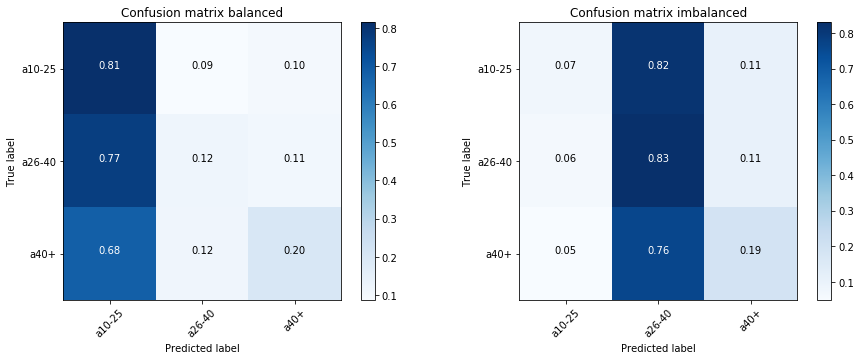

##############################
Dataset  enblog / lang en


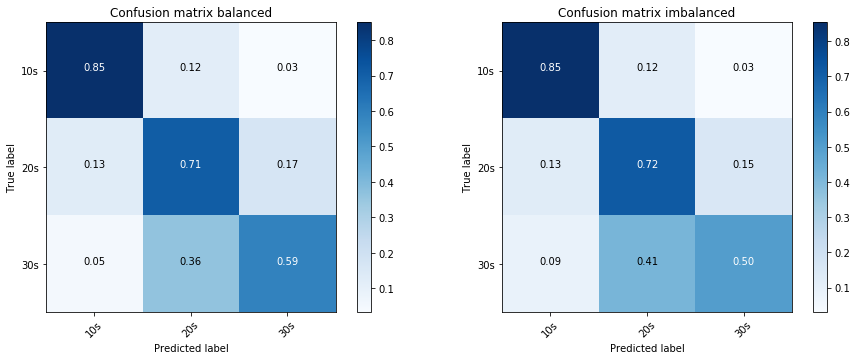

##############################
Dataset  b5post / lang pt


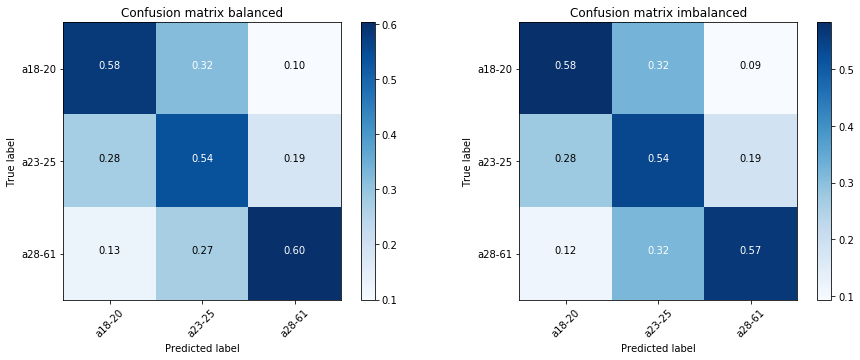

##############################
Dataset  pan13 / lang en


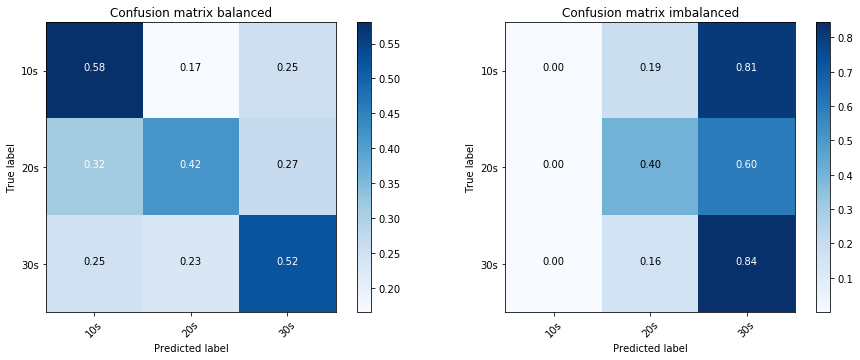

##############################
Dataset  pan13 / lang es


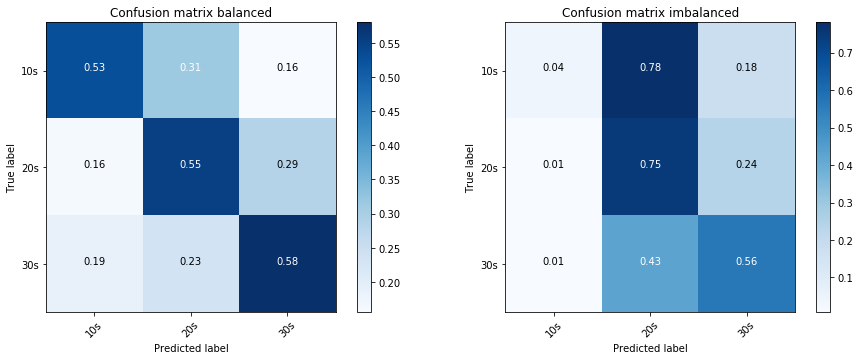

##############################
Dataset  esic / lang pt


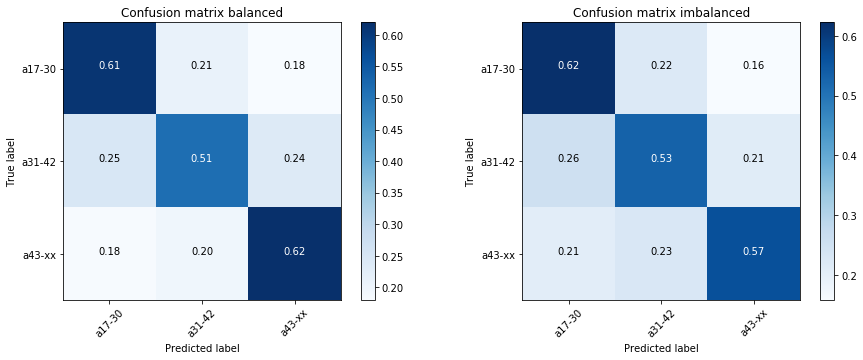

##############################
Dataset  smscorpus / lang en


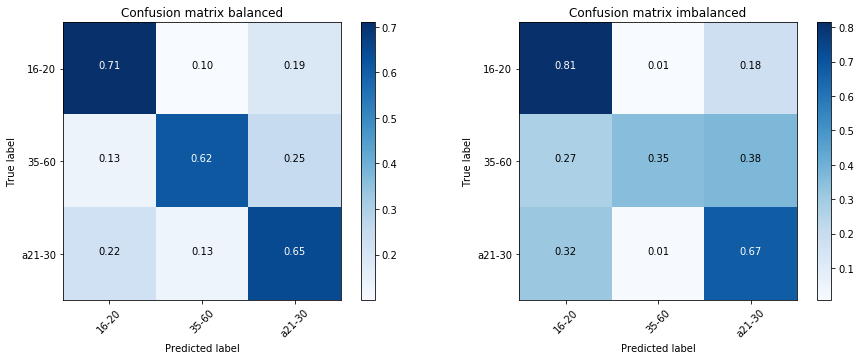

In [153]:
check_cm('age')

##############################
Dataset  brmoral / lang pt


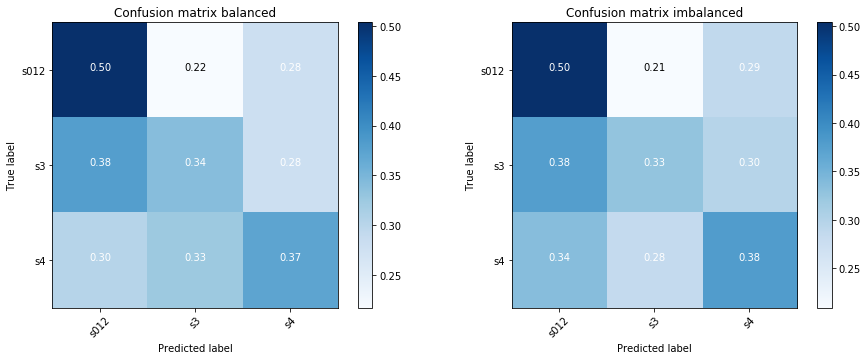

##############################
Dataset  brblogset / lang pt


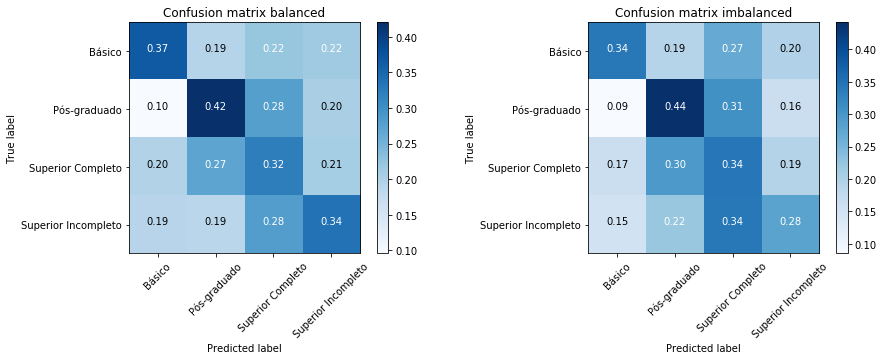

##############################
Dataset  esic / lang pt


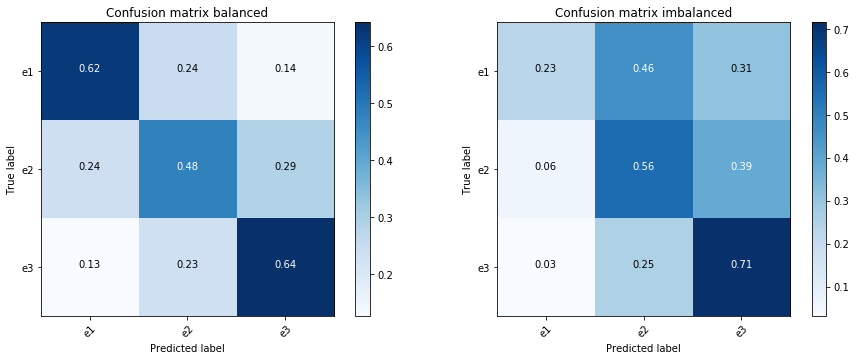

In [154]:
check_cm('education')

##############################
Dataset  brmoral / lang pt


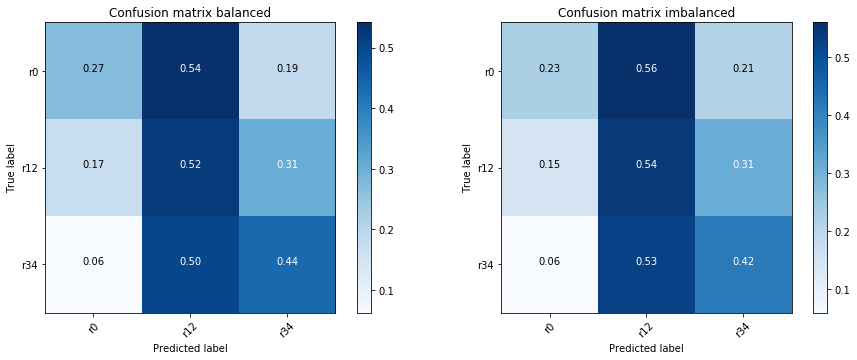

##############################
Dataset  b5post / lang pt


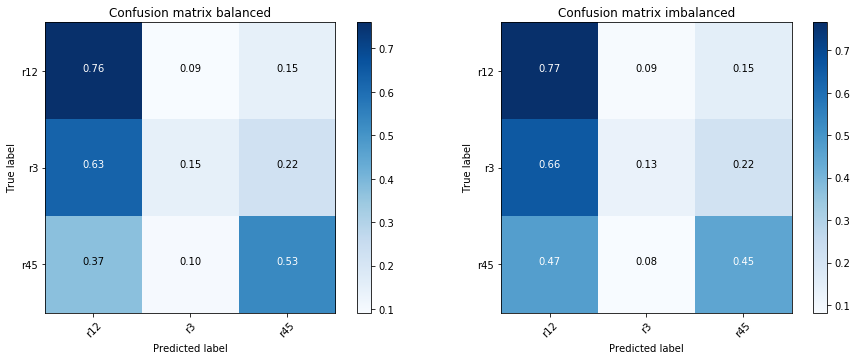

In [155]:
check_cm('religion')

##############################
Dataset  esic / lang pt


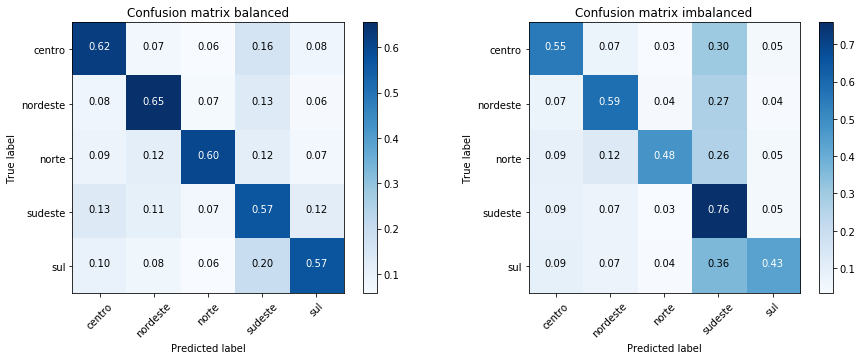

In [156]:
check_cm('region')

##############################
Dataset  brmoral / lang pt


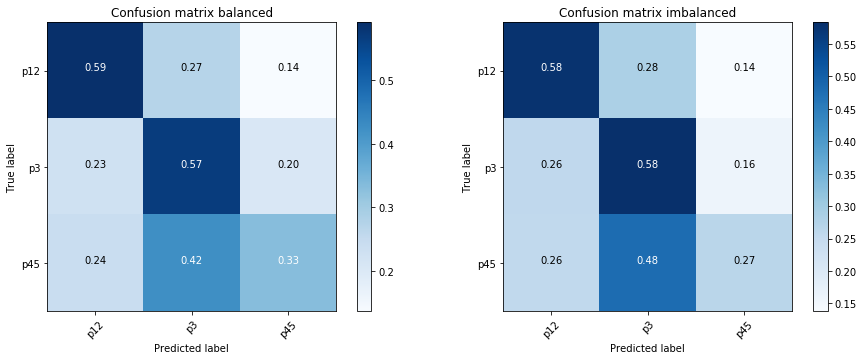

In [158]:
check_cm('politics')

##############################
Dataset  esic / lang pt


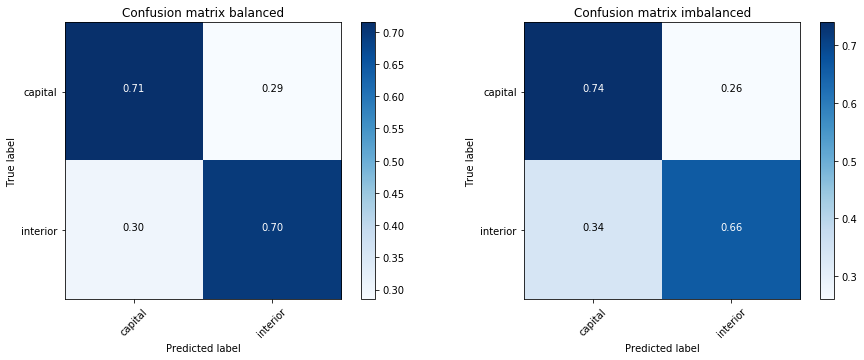

In [159]:
check_cm('city')

# AUC ROC Curve

In [170]:
from sklearn.metrics import roc_curve, auc

n_classes = 2
y_test  = [1, 0, 1, 0, 1, 1, 1]
y_score = [0.1, 0.1, 0.7, 0.1, 0.4, 0.1, 0.6]

In [183]:
fpr, tpr, _ = roc_curve(y_test, y_score)
 
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

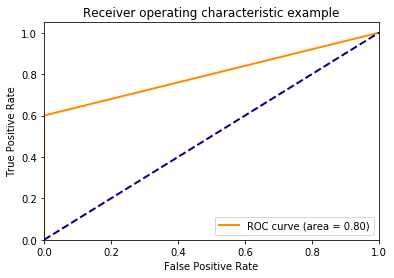

In [181]:
plt.figure(0)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [188]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = fpr # all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += all_fpr + fpr + tpr

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices